In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('data/walmart_stock.csv',index_col='Date',parse_dates=True)
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


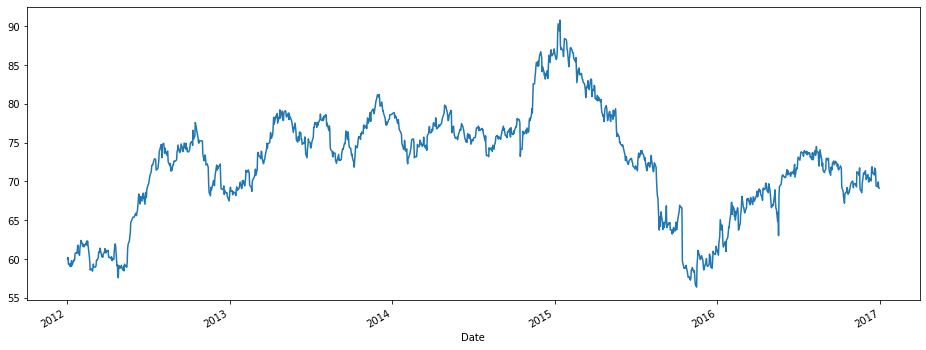

In [4]:
df['Open'].plot(figsize=(16,6))

In [6]:
# Every 7 days - not inplace
df.rolling(7).mean().head(20)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-11,59.495714,59.895714,59.074285,59.440000,9.007414e+06,51.842984
2012-01-12,59.469999,59.744285,59.007143,59.321429,8.231357e+06,51.739567
2012-01-13,59.322857,59.638571,58.941428,59.297143,7.965071e+06,51.718386


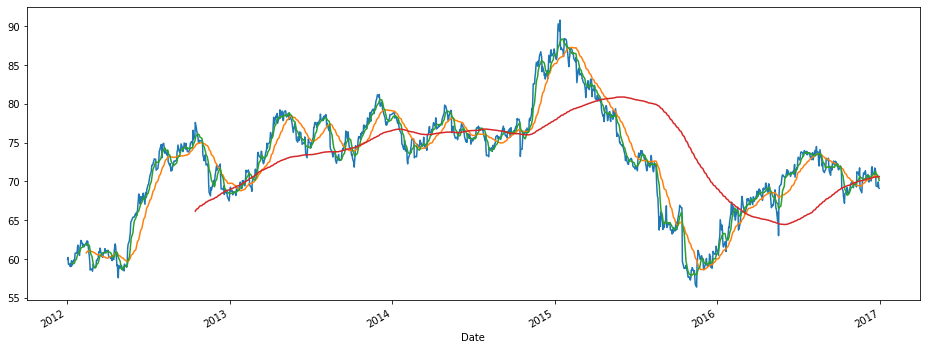

In [11]:
# Not that the noise is reduced on the orange or rolling mean function
# THIS IS ESSENTIAL A MOVING AVERAGE !!!! 9,30,200 HAHAH
df['Open'].plot()
df.rolling(window=30).mean()['Close'].plot(figsize=(16,6))
df.rolling(window=9).mean()['Close'].plot(figsize=(16,6))
df.rolling(window=200).mean()['Close'].plot(figsize=(16,6))

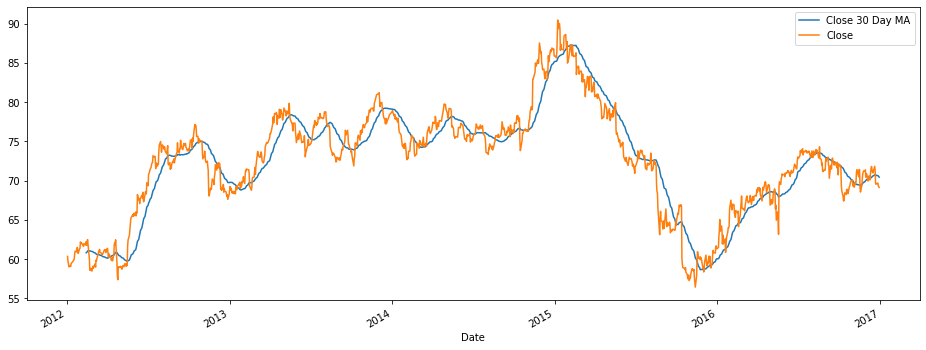

In [13]:
df['Close 30 Day MA'] = df['Close'].rolling(window=30).mean()
df[['Close 30 Day MA','Close']].plot(figsize=(16,6))

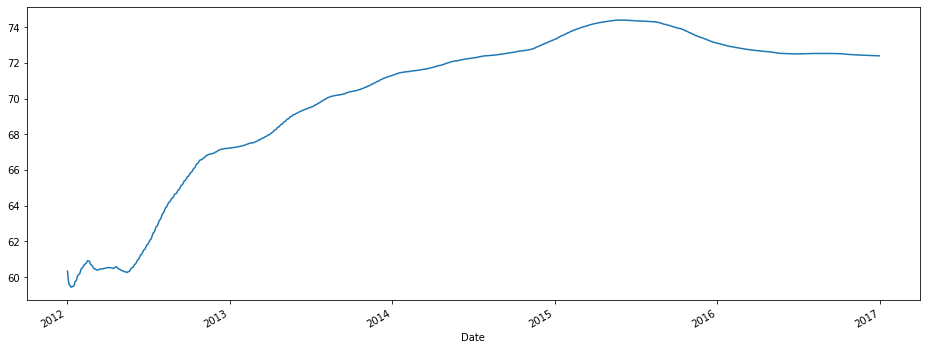

In [15]:
#This plot represents each time stamp what is shown is the average y value of all the values came before it
df['Close'].expanding().mean().plot(figsize=(16,6))

# Bollinger Bands

In [16]:
# use the bans when a price movement is significant or not
# identify tops and bottoms
# describe the actual trend,
# typically use 20 Day MA 
# Upper band; Lower band
# Bands expand as stock becomes more volatile
# Band contract when stock consolidates
# determine whether a price movement is signifcant or not

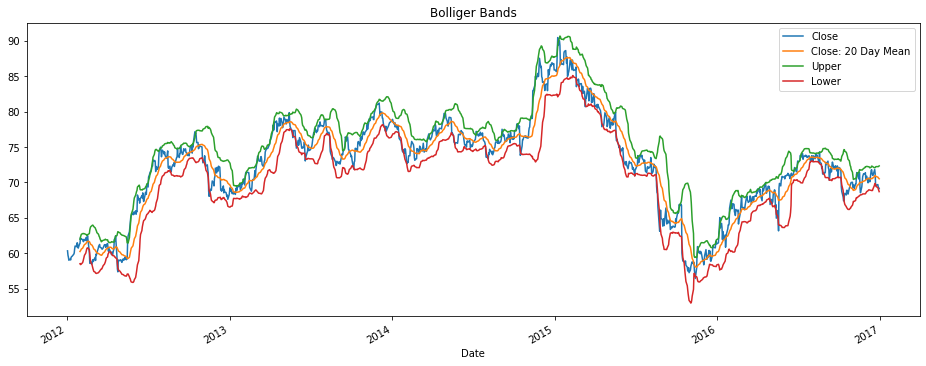

In [21]:
# Close 20 MA
df['Close: 20 Day Mean'] = df['Close'].rolling(20).mean()

# Upper Band = 20MA + 2 * std(20)
df['Upper'] = df['Close: 20 Day Mean'] + 2 * (df['Close'].rolling(20).std())

# Lower Band = 20MA - 2 * std(20)
df['Lower'] = df['Close: 20 Day Mean'] - 2 * (df['Close'].rolling(20).std())

# Close
df[['Close','Close: 20 Day Mean','Upper','Lower']].plot(figsize=(16,6),
                                                        title='Bolliger Bands')